---
---

<h1><center><ins>Numerical Methods: Exam 1, Part 2</ins></center></h1>
<h2><center>November 27, 09:45-11:15 </center></h2>

Please compute the below questions in the python notebook, *documenting your code* where needed. 

Remember also to **_answer any discussion points asked in the question_**.  

***Before 11:20*** your notebook needs to be uploaded to Moodle, and/or emailed to (both) Alina and Vlad <br> (alina.boecker@univie.ac.at, vlad.rastau@univie.ac.at)<br>
<br>
This means you have roughly 60 minutes to complete the exercises in this part.
from scipy.interpolate import interp1d
from numpy import pi,sqrt
You may use the lecture notes and any of your exercise notebooks freely, but you can not use ChatGPT code assistant or other AI coding tools.<br> 
**_Collaboration or plagarized code in any way is prohibited and no phones or communication will be allowed_**.

---
---

## Exercise 1

Consider the following second-order ordinary differential equation:
$$ \frac{d^2 z}{dx^2} + z = 0 \ . $$

**(a)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that, at $x = 0$, we have $z = 0$ and $dz/dx = 1$. Consider two integration steps of $h = 0.5$ **and** $h = 0.1$. The total integration time is $6 \pi$. Additionally, solve the ODE with the **build-in scipy version** (scipy.integrate.solve_ivp), which implements the **Runge-Kutta method of order 5(4)** as a default with a integration of $h = 0.1$. Plot all three solutions in **one** figure (don't forget labelling your lines).

**(b)** Consider the solution of the ODE, which is $$ z(x) = c_1 \sin(x) + c_2 \cos(x), $$ where $c_1$ and $c_2$ are constants. Write down the matrix representation (i.e., $ A \cdot x = b $) of the set of equations you need to solve in order to find $c_1$ and $c_2$ (Hint: the second equation is $dz/dx$). Use the LU decomposition (use build-in python/scipy) to find the values for $c_1$ and $c_2$. What is the final solution of $ z(x) $ given the initial conditions from **(a)**?

**(c)** Plot the absolute difference of the analytic solution you found in **(b)** with the **3** numerical solution from **(a)** in one figure. Discuss your findings.

### A

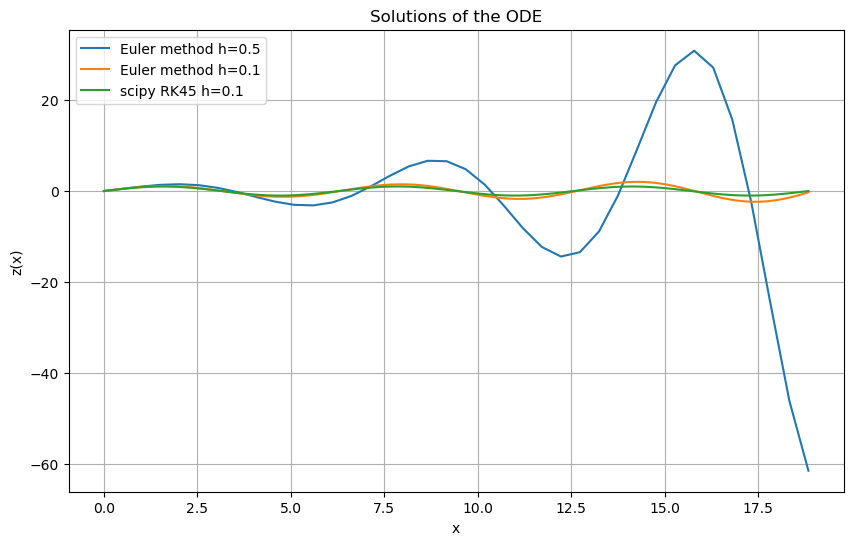

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# defining the system of odes
def derivatives(x, y):
    y1, y2 = y
    dy1dx = y2
    dy2dx = -y1
    return np.array([dy1dx, dy2dx])

# Euler method 
def euler_method(deriv_func, y0, x0, x_end, h):
    n_steps = int((x_end - x0) / h) + 1
    x = np.linspace(x0, x_end, n_steps)
    y = np.zeros((2, n_steps))
    y[:, 0] = y0
    for i in range(n_steps - 1):
        y[:, i + 1] = y[:, i] + h * deriv_func(x[i], y[:, i])
    return x, y

# initial parameters
x0 = 0
x_end = 6 * np.pi
y0 = np.array([0, 1])

# solve and h1 = 0.5
h1 = 0.5
x1, y1 = euler_method(derivatives, y0, x0, x_end, h1)

# with h = 0.1
h2 = 0.1
x2, y2 = euler_method(derivatives, y0, x0, x_end, h2)
t_eval = x2

# using scipy's runge rk45 
sol = solve_ivp(derivatives, [x0, x_end], y0, method='RK45', t_eval=t_eval, max_step=h2)

# plotting 
plt.figure(figsize=(10, 6))
plt.plot(x1, y1[0, :], label='Euler method h=0.5')
plt.plot(x2, y2[0, :], label='Euler method h=0.1')
plt.plot(sol.t, sol.y[0, :], label='scipy RK45 h=0.1')
plt.xlabel('x')
plt.ylabel('z(x)')
plt.title('Solutions of the ODE')
plt.legend()
plt.grid(True)
plt.show()


### B

In [18]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# define matrix A and vector b
A = np.array([[0, 1],
              [1, 0]], dtype=float)
b = np.array([0, 1], dtype=float)

#  LU decomp
lu, piv = lu_factor(A)

# Solve for x (c1 and c2)
x = lu_solve((lu, piv), b)

c1, c2 = x

print(f"c1 = {c1}")
print(f"c2 = {c2}")
print(f" z(x) = {c1} * sin(x) + {c2} * cos(x)")


c1 = 1.0
c2 = 0.0
 z(x) = 1.0 * sin(x) + 0.0 * cos(x)


### C

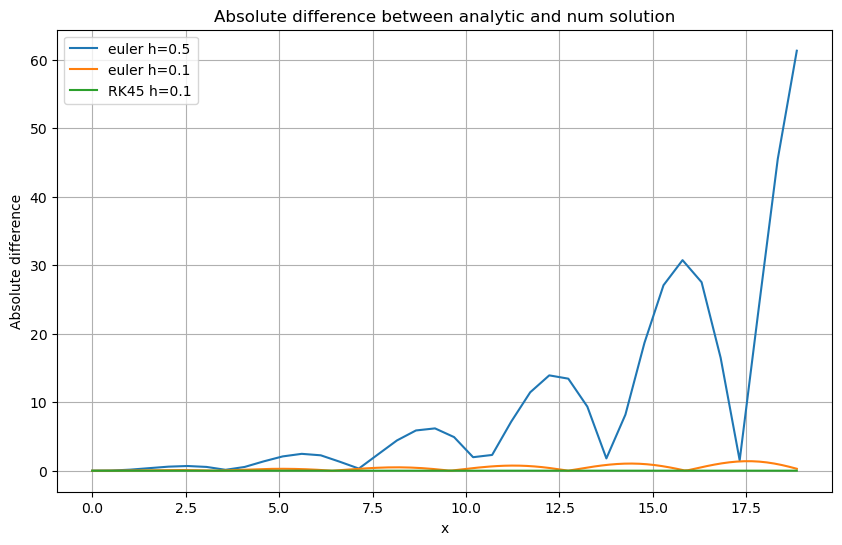

In [19]:

x0, x_end = 0, 6 * np.pi
y0 = np.array([0, 1])

# euler h = 0.5
h1 = 0.5
x1, y1 = euler_method(derivatives, y0, x0, x_end, h1)

# euler  h = 0.1
h2 = 0.1
x2, y2 = euler_method(derivatives, y0, x0, x_end, h2)

# analytical solution
z_analytic = np.sin(x2)

# using ivp with rk45
t_eval = x2
sol = solve_ivp(derivatives, [x0, x_end], y0, method='RK45', t_eval=t_eval)

# Compute absolute differences
abs_diff_euler_h1 = np.abs(z_analytic[::int(h1/h2)] - y1[0])
abs_diff_euler_h2 = np.abs(z_analytic - y2[0])
abs_diff_rk45 = np.abs(z_analytic - sol.y[0])

# plotting the differences
plt.figure(figsize=(10, 6))
plt.plot(x1, abs_diff_euler_h1, label='euler h=0.5')
plt.plot(x2, abs_diff_euler_h2, label='euler h=0.1')
plt.plot(x2, abs_diff_rk45, label='RK45 h=0.1')
plt.xlabel('x')
plt.ylabel('Absolute difference')
plt.title('Absolute difference between analytic and num solution')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 2

Consider the following two curves:
$$ y = 1 - x^2 $$
$$ y = x $$

**(a)** Use _**your own version**_ of the **Newton Raphson method** to find the two intersections of these curves. Plot the curves as well in a figure to understand sensible guesses for the starting points two find the two points with the Newton Raphson method.

**(b)** Use _**your own version**_ of the **Simpson method** to find the area between the two curves (Hint: use the points calculated from **(a)** as the upper and lower limits for the integration). Sample the integrand at 100 equally spaced abscissae. Compare this result with the _**build-in version_** of **scipy.integrate.quad**, which uses adaptive Gaussian quadrature.

**(c)** How many samples of abscissae do you need for your Simpson method in order to reach the same result provided by scipy.integrate.quad with a precision of 1e-4? Per iteration multiply the number of abscissae by 10. How does this compare to the error returned by the scipy.integrate.quad routine? Comment on this.

**(d)** **BONUS**: In your figure from **(a)** shade the area you calculated between the two curves. Hint: Use fill_between from matplotlib. 

### A

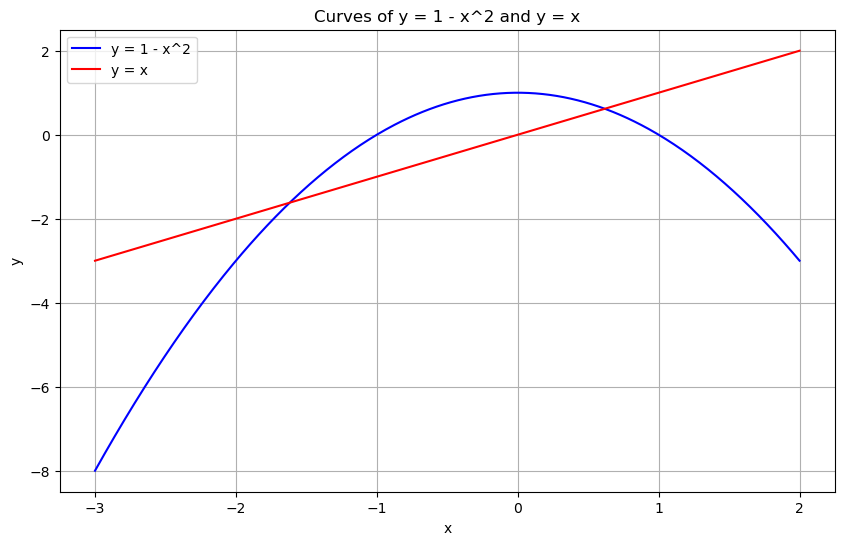

the left intersection point:

Converged to x = -1.618033988749895 after 5 iterations.

the right intersection point:

Converged to x = 0.6180339887498948 after 5 iterations.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


#  intial f(x)
def f(x):
    return x**2 + x - 1

# derv f'(x) = 2x + 1
def f_prime(x):
    return 2*x + 1

# newton raphson method
def newton_raphson(x0, tol=1e-10, max_iter=100):
    x_n = x0
    for n in range(max_iter):
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)
        if f_prime_xn == 0:
            print("0 deriv at x = {:.6f}. No solution found".format(x_n))
            return None
        x_next = x_n - f_xn / f_prime_xn
        # Debug statement to trace computation values
        if abs(x_next - x_n) < tol:
            print(f"\nConverged to x = {x_next} after {n+1} iterations.")
            return x_next
        x_n = x_next
    print("Exceeded max iterations and no solution found.")
    return None

# define the range of x values
x_values = np.linspace(-3, 2, 500)

# define the two functions
y1 = 1 - x_values**2  # y = 1 - x^2
y2 = x_values         # y = x

plt.figure(figsize=(10, 6))
plt.plot(x_values, y1, label='y = 1 - x^2', color='blue')
plt.plot(x_values, y2, label='y = x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curves of y = 1 - x^2 and y = x')
plt.legend()
plt.grid(True)
plt.show()

# Initial guesses from the plot
x0_left = -2
x0_right = 1 
# Find the left root
print("the left intersection point:")
root_left = newton_raphson(x0_left)

# Find the right root
print("\nthe right intersection point:")
root_right = newton_raphson(x0_right)



### B

In [21]:
def integrand(x):
    return 1 - x**2 - x

# Limits of a, b from part A
a = -1.61803398875 
b = 0.61803398875   

# Number of intervals = even )
n_intervals = 100
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # Make sure n is even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1]  # First and last terms
    S += 2 * np.sum(y[2:-1:2])  # Even indices
    S += 4 * np.sum(y[1::2])    # Odd indices
    return (h / 3) * S

area_simpson = simpson_rule(integrand, a, b, n_intervals)
print("Area computed using Simpson's method:", area_simpson)


Area computed using Simpson's method: 1.8633899812498245


### C

Simpson's method is extremely effective as seen below, requiring only a small number of samples to get very high precision. This is because the method is exact for polynomials up to third degree with proper intervals

In [22]:
from scipy.integrate import quad

# scipy quad funct
area_quad, error_quad = quad(integrand, a, b)
print("Area computed using scipy.quad:", area_quad)
print("Error estimate from quad:", error_quad)

n_intervals = 10  # initial intervals
tolerance = 1e-4  # wanted precision
found_precision = False

while not found_precision:
    area_simpson = simpson_rule(integrand, a, b, n_intervals)
    difference = abs(area_simpson - area_quad)
    print(f"n_intervals = {n_intervals}, Area = {area_simpson}, Difference = {difference}")
    if difference < tolerance:
        found_precision = True
        print(f"\ndesired precision achieved with n_intervals = {n_intervals}")
    else:
        n_intervals *= 10  # Increase intervals by a factor of 10


Area computed using scipy.quad: 1.863389981249825
Error estimate from quad: 2.0687784610393942e-14
n_intervals = 10, Area = 1.8633899812498245, Difference = 4.440892098500626e-16

desired precision achieved with n_intervals = 10


In [23]:

x = np.linspace(a, b, 400)

# Step 4: Calculate y values for both functions
y1 = f1(x)
y2 = f2(x)

# Step 5: Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = 1 - x^2', color='blue')
plt.plot(x, y2, label='y = x', color='red')

# Step 6: Shade the area between the curves
plt.fill_between(x, y1, y2, where=(y1 > y2), color='lightgreen', alpha=0.5)

# Step 7: Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Area between')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'f1' is not defined